In [56]:
import pandas as pd
import numpy as np

# Data Ingestion

In [59]:
ins_df = pd.read_csv("insurance.csv")
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Summary

In [61]:
ins_df.shape

(1338, 7)

**Inference:** The data has 1338 observations and 7 variables.

In [63]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Inference:** The data set has 7 variables out of which 4 are numerical, and 3 are categorical. All the variables do not contain null values.

In [67]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Inference:** We don't notice any abnormalities in the numerical data.

In [70]:
ins_df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**Inference:** We can notice the number of unique categories, the category of maximum count and frequency for each of the variables from the data.

## Correlation Plot

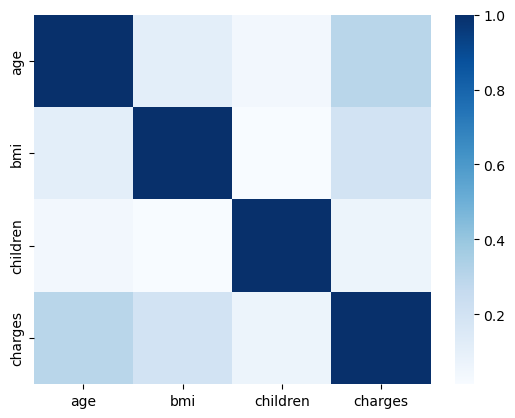

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corr = ins_df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Blues')
plt.show()

**Inference:** From the above graph, we can infer that no columns are highly correlated with each other.

## Feature Engineering

Engineering a new feature, **`weight_status`** from column, `bmi`

In [78]:
ins_df['weight_status'] = np.where(ins_df['bmi'] < 18.000, 'underweigth',
                               np.where(ins_df['bmi'] < 25.000, 'normal',
                                       np.where(ins_df['bmi'] < 30.000, 'overweight', 'obese')))
ins_df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [79]:
ins_df  = ins_df.drop('bmi', axis = 1)

# Data Cleaning

## Missing values

In [83]:
ins_df.isnull().values.any()

False

In [84]:
missing_values = ins_df.isnull().sum()
missing_values

age              0
sex              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

**Inference:** There are no missing values in the data.

## Scaling of numeric features

In [87]:
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
ins_df[['age', 'children']] = min_max.fit_transform(ins_df[['age', 'children']])

## Outlier Treatment

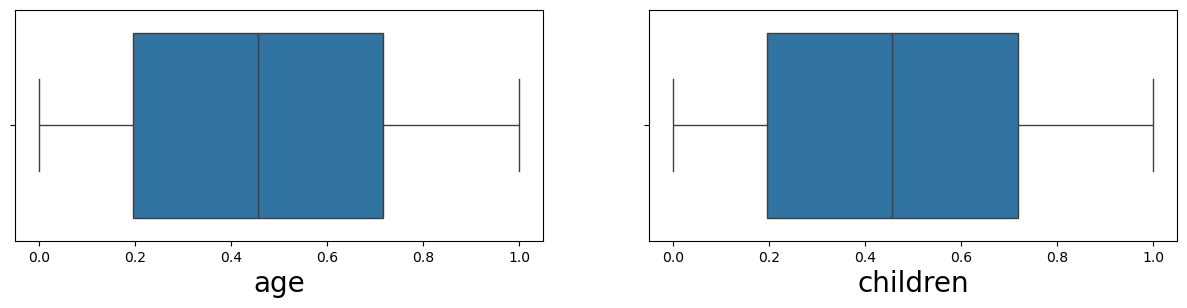

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
for variable, subplot in zip(ins_df[['age','children']], ax.flatten()):
    z = sns.boxplot(x = ins_df['age'], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

**Inference:** There are no outliers.

## One-hot Encoding

In [92]:
print("Categories in 'sex' variable:     ",end=" " )
print(ins_df['sex'].unique())

print("Categories in 'region' variable:  ",end=" ")
print(ins_df['region'].unique())

print("Categories in'smoker' variable:",end=" " )
print(ins_df['smoker'].unique())

print("Categories in 'weight_status' variable:     ",end=" " )
print(ins_df['weight_status'].unique())

Categories in 'sex' variable:      ['female' 'male']
Categories in 'region' variable:   ['southwest' 'southeast' 'northwest' 'northeast']
Categories in'smoker' variable: ['yes' 'no']
Categories in 'weight_status' variable:      ['overweight' 'obese' 'normal' 'underweigth']


In [95]:
ins_df = pd.get_dummies(ins_df, columns=['sex', 'region', 'smoker', 'weight_status'], drop_first=True).astype('float')
ins_df.head()

,age,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,weight_status_obese,weight_status_overweight,weight_status_underweigth
0,0.021739,0.0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.000000,0.2,1725.55230,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.6,4449.46200,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.0,21984.47061,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.304348,0.0,3866.85520,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
ins_df.shape

(1338, 11)

## Train-Test split

In [102]:
y = ins_df['charges']
X = ins_df.drop('charges', axis = 1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 10), (268, 10))

# Hyperparameter Tuning & Model Training

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
import optuna
from sklearn.model_selection import cross_val_score
optuna.logging.set_verbosity(optuna.logging.WARNING)

### XGBoost Regressor

In [112]:
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 200)
    max_depth = trial.suggest_int("max_depth", 2, 16)
    #learning_rate = trial.suggest_int("min_samples_leaf", 1, 8)

    # Create the model with suggested hyperparameters
    model = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    return scores.mean()  # Return the metric to maximize

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")  # For accuracy, we maximize
study.optimize(objective, n_trials=50)  # Number of trials (iterations)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best hyperparameters: {'n_estimators': 102, 'max_depth': 2}
Best accuracy: 0.8444527291267578


In [113]:
xgb_model = XGBRegressor(n_estimators=122, learning_rate=0.1, max_depth=2, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=122, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [114]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb[0:10]

array([10540.274 ,  6498.75  , 27860.979 , 10094.119 , 36109.656 ,
        6061.973 ,  2682.0933, 14795.866 ,  3598.2002, 11332.285 ],
      dtype=float32)

In [115]:
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = root_mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {xgb_mae}, MSE: {xgb_mse}, RMSE: {xgb_rmse}, R^2: {xgb_r2}")

XGBoost MAE: 2490.844538806611, MSE: 19852972.108865526, RMSE: 4455.667414525631, R^2: 0.8721215180433373


In [116]:
print('Model Accuracy Score:', (xgb_model.score(X_test, y_test))*100)

Model Accuracy Score: 87.21215180433373


### RANDOM_FOREST_REGRESSOR

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 200)
    max_depth = trial.suggest_int("max_depth", 2, 16)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 16)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 8)

    # Create the model with suggested hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split = min_samples_split,
        min_samples_leaf = min_samples_leaf,
        random_state=42
    )
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="r2")
    return scores.mean()  # Return the metric to maximize

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")  # For accuracy, we maximize
study.optimize(objective, n_trials=50)  # Number of trials (iterations)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best hyperparameters: {'n_estimators': 131, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 8}
Best accuracy: 0.8508793416959178


In [121]:
rf_model = RandomForestRegressor(n_estimators=161, max_depth= 4, min_samples_split= 9, min_samples_leaf= 8, random_state=42)

In [122]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=9,
                      n_estimators=161, random_state=42)

In [123]:
y_pred_rf = rf_model.predict(X_test)

In [124]:
rf_mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print(f"Mean Absolute Error: {rf_mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 2578.442472216853
R^2 Score: 0.8694989841293538


In [125]:
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest Regressor MAE: {rf_mae}, MSE: {rf_mse},RMSE: {rf_rmse}, R^2: {rf_r2}")

Random Forest Regressor MAE: 2578.442472216853, MSE: 20260117.17230562,RMSE: 4501.123989883596, R^2: 0.8694989841293538


In [127]:
print('Model Accuracy Score:', (rf_model.score(X_test, y_test))*100)

Model Accuracy Score: 86.94989841293538


### ADA_BOOST_REGRESSOR

In [129]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    learning_rate = trial.suggest_int("learning_rate", 0.01, 0.1)

    # Create the model with suggested hyperparameters
    model = AdaBoostRegressor(
        n_estimators=n_estimators,
        estimator=LinearRegression(),
        random_state=42
    )
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="r2")
    return scores.mean()  # Return the metric to maximize

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")  # For accuracy, we maximize
study.optimize(objective, n_trials=50)  # Number of trials (iterations)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best hyperparameters: {'n_estimators': 111, 'learning_rate': 0}
Best accuracy: 0.7127371245888069


In [131]:
# AdaBoost Regressor
ada_model = AdaBoostRegressor(estimator=LinearRegression(), n_estimators=175, learning_rate = 0.1, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Evaluate AdaBoost
ada_mae = mean_absolute_error(y_test, y_pred_ada)
ada_mse = mean_squared_error(y_test, y_pred_ada)
ada_r2 = r2_score(y_test, y_pred_ada)
ada_rmse = np.sqrt(ada_mse)
print(f"AdaBoost MAE: {ada_mae}, MSE: {ada_mse},RMSE: {ada_rmse}, R^2: {ada_r2}")

AdaBoost MAE: 5115.893373219336, MSE: 39722494.23055291,RMSE: 6302.578379564423, R^2: 0.7441364328786302


In [132]:
print('Model Accuracy Score:', (ada_model.score(X_test, y_test))*100)

Model Accuracy Score: 74.41364328786302


### BAGGING_REGRESSOR

In [135]:
from sklearn.ensemble import BaggingRegressor

def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 500)

    # Create the model with suggested hyperparameters
    model = BaggingRegressor(
        estimator=LinearRegression(),
        n_estimators=n_estimators,
        random_state=42
    )
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="r2")
    return scores.mean()  # Return the metric to maximize

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")  # For accuracy, we maximize
study.optimize(objective, n_trials=50)  # Number of trials (iterations)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best hyperparameters: {'n_estimators': 405}
Best accuracy: 0.7403597146530104


In [137]:
# Bagging Regressor
bagging_model = BaggingRegressor(estimator=LinearRegression(), n_estimators=407, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

In [138]:
# Evaluate Bagging
bagging_mae = mean_absolute_error(y_test, y_pred_bagging)
bagging_mse = mean_squared_error(y_test, y_pred_bagging)
bagging_r2 = r2_score(y_test, y_pred_bagging)
bagging_rmse = np.sqrt(bagging_mse)

print(f"Bagging MAE: {bagging_mae}, MSE: {bagging_mse},RMSE: {bagging_rmse} ,R^2: {bagging_r2}")

Bagging MAE: 4325.72497309151, MSE: 34506710.13803794,RMSE: 5874.241239346401 ,R^2: 0.777732740187533


In [139]:
print('Model Accuracy Score:', (bagging_model.score(X_test, y_test))*100)

Model Accuracy Score: 77.7732740187533


### CATBOOST REGRESSOR

In [141]:
from catboost import CatBoostRegressor

In [142]:
def objective(trial):
    # Suggest hyperparameters
    iterations = trial.suggest_int("iterations", 100, 1000)
    depth = trial.suggest_int("depth", 3, 10)
    l2_leaf_reg	= trial.suggest_int("l2_leaf_reg", 1.0, 10.0)
    
    # Create the model with suggested hyperparameters
    model = CatBoostRegressor(
        verbose = False,
        iterations=iterations,
        depth = depth,
        l2_leaf_reg = l2_leaf_reg,
        random_state=42
    )
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="r2")
    return scores.mean()  # Return the metric to maximize

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")  # For accuracy, we maximize
study.optimize(objective, n_trials=10)  # Number of trials (iterations)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best hyperparameters: {'iterations': 567, 'depth': 5, 'l2_leaf_reg': 10}
Best accuracy: 0.8503769954340724


In [143]:
cat_model = CatBoostRegressor(iterations= 507, depth= 4, l2_leaf_reg= 7, random_state=42, verbose = False)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# Evaluate Bagging
cat_mae = mean_absolute_error(y_test, y_pred_bagging)
cat_mse = mean_squared_error(y_test, y_pred_bagging)
cat_r2 = r2_score(y_test, y_pred_bagging)
cat_rmse = np.sqrt(bagging_mse)

print(f"CatBoost MAE: {cat_mae}, MSE: {cat_mse}, RMSE: {cat_rmse} ,R^2: {cat_r2}")

CatBoost MAE: 4325.72497309151, MSE: 34506710.13803794, RMSE: 5874.241239346401 ,R^2: 0.777732740187533


In [144]:
print('Model Accuracy Score:', (bagging_model.score(X_test, y_test))*100)

Model Accuracy Score: 77.7732740187533


In [145]:
# Compare all models
models_metrics = {
    "Model": ["Random Forest", "XGBoost","AdaBoost", "Bagging", "CatBoost"],
    "MAE": [rf_mae, xgb_mae, ada_mae, bagging_mae, cat_mae],
    "MSE": [rf_mse, xgb_mse, ada_mse, bagging_mse, cat_mse],
    "RMSE": [rf_rmse,xgb_rmse, ada_rmse, bagging_rmse, cat_rmse],
    "R^2": [rf_r2, xgb_r2,ada_r2, bagging_r2, cat_r2]    
}


In [146]:
import pandas as pd
metrics_df = pd.DataFrame(models_metrics)
print(metrics_df)
best_model_name = metrics_df.loc[metrics_df['R^2'].idxmax(), 'Model']
print(f"Best Model: {best_model_name}")

           Model          MAE           MSE         RMSE       R^2
0  Random Forest  2578.442472  2.026012e+07  4501.123990  0.869499
1        XGBoost  2490.844539  1.985297e+07  4455.667415  0.872122
2       AdaBoost  5115.893373  3.972249e+07  6302.578380  0.744136
3        Bagging  4325.724973  3.450671e+07  5874.241239  0.777733
4       CatBoost  4325.724973  3.450671e+07  5874.241239  0.777733
Best Model: XGBoost


### XGBoost

In [151]:
def xgboost_pred():
    XGBmodel = XGBRegressor(n_estimators=122, learning_rate=0.1, max_depth=2)
    model = XGBmodel.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)*100
    print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.21


## Plot y_pred and y_test

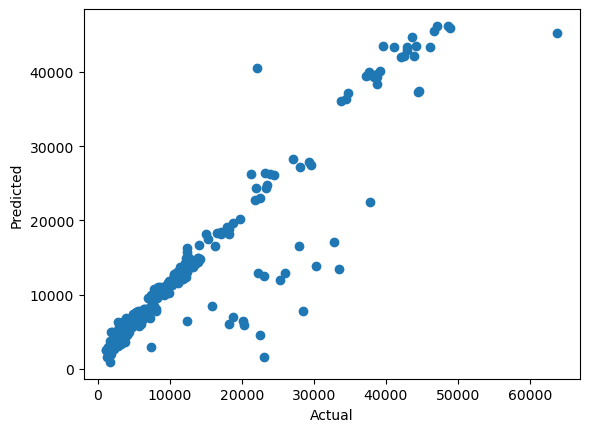

In [154]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

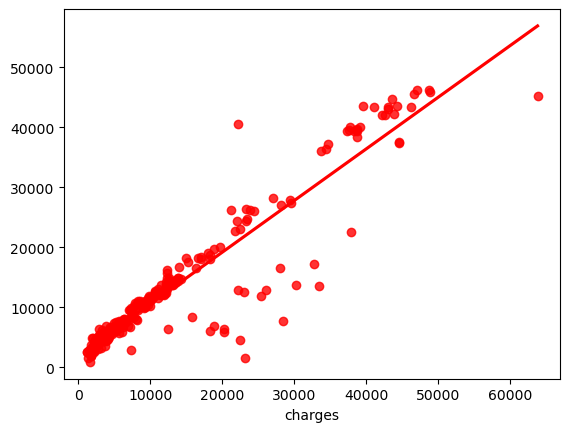

In [155]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');